## Predicting cell identity with CellTypist

## import packages

In [1]:
import scanpy as sc
import scipy as io
import pandas as pd

In [2]:
import celltypist
from celltypist import models

In [3]:
import matplotlib.pyplot as plt

In [4]:
sc.set_figure_params(dpi=100)

## import data

99255 cells × 36601 genes

In [5]:
adata = sc.read('/scratch/manuel.tardaguila/2025_hESC_competition_assays_reanalysed/processing_outputs/merged_unprocessed_db_filt_clustered_QCed_reclustered.h5ad')

In [6]:
adata

AnnData object with n_obs × n_vars = 26185 × 30587
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'percent.mt', 'nCount_RNA_raw', 'nFeature_RNA_raw', 'nCount_ATAC', 'nFeature_ATAC', 'gex_raw_reads', 'gex_mapped_reads', 'gex_conf_intergenic_reads', 'gex_conf_exonic_reads', 'gex_conf_intronic_reads', 'gex_conf_exonic_unique_reads', 'gex_conf_exonic_antisense_reads', 'gex_conf_exonic_dup_reads', 'gex_exonic_umis', 'gex_conf_intronic_unique_reads', 'gex_conf_intronic_antisense_reads', 'gex_conf_intronic_dup_reads', 'gex_intronic_umis', 'gex_conf_txomic_unique_reads', 'gex_umis_count', 'gex_genes_count', 'atac_raw_reads', 'atac_unmapped_reads', 'atac_lowmapq', 'atac_dup_reads', 'atac_chimeric_reads', 'atac_mitochondrial_reads', 'atac_fragments', 'atac_TSS_fragments', 'atac_peak_region_fragments', 'atac_peak_region_cutsites', 'TSS.enrichment', 'TSS.percentile', 'scDblFinder.class', 'scDblFinder.score', 'scDblFinder.weighted', 'scDblFinder.cxds_score', 'scDblFinder.class_atac', 'scDblFi

In [8]:
adata.obs.head(2)

,orig.ident,nCount_RNA,nFeature_RNA,percent.mt,nCount_RNA_raw,nFeature_RNA_raw,nCount_ATAC,nFeature_ATAC,gex_raw_reads,gex_mapped_reads,...,doublet_amulet,Diff,doublet,nCount_SCT,nFeature_SCT,SCT.weight,ATAC.weight,wsnn_res.2,seurat_clusters,wsnn_res.0.5
cell_barcode,,,,,,,,,,,,,,,,,,,,,
MCO_01326_AAACAGCCACAGCCAT-1,MCO_01326,10351.0,4753,0.473384,11643.0,4772,29946.0,7431,23298,22654,...,False,Diff_MK,False,10810.0,4752,0.752996,0.247004,7,2,2
MCO_01326_AAACAGCCACCAGGTT-1,MCO_01326,9507.0,4435,0.336594,10909.0,4612,90488.0,20806,21771,21165,...,False,Diff_MK,False,10669.0,4435,0.577344,0.422656,7,2,2


In [9]:
adata.obs.columns

Index(['orig.ident', 'nCount_RNA', 'nFeature_RNA', 'percent.mt',
       'nCount_RNA_raw', 'nFeature_RNA_raw', 'nCount_ATAC', 'nFeature_ATAC',
       'gex_raw_reads', 'gex_mapped_reads', 'gex_conf_intergenic_reads',
       'gex_conf_exonic_reads', 'gex_conf_intronic_reads',
       'gex_conf_exonic_unique_reads', 'gex_conf_exonic_antisense_reads',
       'gex_conf_exonic_dup_reads', 'gex_exonic_umis',
       'gex_conf_intronic_unique_reads', 'gex_conf_intronic_antisense_reads',
       'gex_conf_intronic_dup_reads', 'gex_intronic_umis',
       'gex_conf_txomic_unique_reads', 'gex_umis_count', 'gex_genes_count',
       'atac_raw_reads', 'atac_unmapped_reads', 'atac_lowmapq',
       'atac_dup_reads', 'atac_chimeric_reads', 'atac_mitochondrial_reads',
       'atac_fragments', 'atac_TSS_fragments', 'atac_peak_region_fragments',
       'atac_peak_region_cutsites', 'TSS.enrichment', 'TSS.percentile',
       'scDblFinder.class', 'scDblFinder.score', 'scDblFinder.weighted',
       'scDblFinder.cx

# import model Alsinet

In [10]:
new_model = models.Model.load('/group/soranzo/manuel.tardaguila/2025_hESC_MK_multiome/Dependencies/model_Alsinet.pkl')

In [11]:
new_model

CellTypist model with 18 cell types and 4199 features
    date: 2025-01-22 16:40:15.475078
    cell types: AdvancedMesoderm, EarlyFibroblasts, ..., iPSCs
    features: SAMD11, NOC2L, ..., MT-CYB

### apply the model to the object

In [12]:
adata.X.min()

0.0

In [13]:
adata.X.max()

8.212568398234145

In [14]:
adata.raw = adata

In [15]:
adata.raw.X.min()

0.0

In [16]:
adata.raw.X.max()

8.212568398234145

In [17]:
adata.X.expm1().sum(axis = 1)

matrix([[10810.],
        [10669.],
        [12530.],
        ...,
        [ 3812.],
        [ 4934.],
        [ 3980.]])

## Renormalize to log1p

In [18]:
sc.pp.normalize_per_cell(adata, counts_per_cell_after=1e4) 

In [19]:
sc.pp.log1p(adata)

In [20]:
adata.X.expm1().sum(axis = 1)

matrix([[10000.],
        [10000.],
        [10000.],
        ...,
        [10000.],
        [10000.],
        [10000.]])

In [21]:
#celltypist.annotate??

In [22]:
predictions = celltypist.annotate(adata, model = new_model)

🔬 Input data has 26185 cells and 30587 genes
🔗 Matching reference genes in the model
🧬 4127 features used for prediction
⚖️ Scaling input data
🖋️ Predicting labels
✅ Prediction done!


In [23]:
adata = predictions.to_adata()

In [24]:
adata.obs.head(2)

,orig.ident,nCount_RNA,nFeature_RNA,percent.mt,nCount_RNA_raw,nFeature_RNA_raw,nCount_ATAC,nFeature_ATAC,gex_raw_reads,gex_mapped_reads,...,nCount_SCT,nFeature_SCT,SCT.weight,ATAC.weight,wsnn_res.2,seurat_clusters,wsnn_res.0.5,n_counts,predicted_labels,conf_score
cell_barcode,,,,,,,,,,,,,,,,,,,,,
MCO_01326_AAACAGCCACAGCCAT-1,MCO_01326,10351.0,4753,0.473384,11643.0,4772,29946.0,7431,23298,22654,...,10810.0,4752,0.752996,0.247004,7,2,2,4818.728005,iPSCs,0.950286
MCO_01326_AAACAGCCACCAGGTT-1,MCO_01326,9507.0,4435,0.336594,10909.0,4612,90488.0,20806,21771,21165,...,10669.0,4435,0.577344,0.422656,7,2,2,4599.102598,EarlyFibroblasts,0.136130


### visualize celltypist predictions

In [25]:
adata.obs['predicted_labels'].value_counts()

predicted_labels
Megakaryocytes                 9473
MastCells                      5902
NeutrophilMyeloidProgenitor    2243
HemogenicEndothelium           1892
iPSCs                          1857
PrimitiveStreak                1545
EarlyFibroblasts               1236
Mono-DCprec                     450
Monocytes                       402
AdvancedMesoderm                338
Macrophages                     165
Endoderm                        154
MesoEcto                        150
EmergentMesoderm                146
NeuralCrest                     115
MyeloidProgenitors               53
ErythrocyteLineage               44
Fibroblasts                      20
Name: count, dtype: int64

In [26]:
## remove labels under 50 cells
adata.obs['predicted_labels'].value_counts() > 50

predicted_labels
Megakaryocytes                  True
MastCells                       True
NeutrophilMyeloidProgenitor     True
HemogenicEndothelium            True
iPSCs                           True
PrimitiveStreak                 True
EarlyFibroblasts                True
Mono-DCprec                     True
Monocytes                       True
AdvancedMesoderm                True
Macrophages                     True
Endoderm                        True
MesoEcto                        True
EmergentMesoderm                True
NeuralCrest                     True
MyeloidProgenitors              True
ErythrocyteLineage             False
Fibroblasts                    False
Name: count, dtype: bool

In [27]:
## remove labels under 100 cells
adata.obs['predicted_labels'].value_counts() > 100

predicted_labels
Megakaryocytes                  True
MastCells                       True
NeutrophilMyeloidProgenitor     True
HemogenicEndothelium            True
iPSCs                           True
PrimitiveStreak                 True
EarlyFibroblasts                True
Mono-DCprec                     True
Monocytes                       True
AdvancedMesoderm                True
Macrophages                     True
Endoderm                        True
MesoEcto                        True
EmergentMesoderm                True
NeuralCrest                     True
MyeloidProgenitors             False
ErythrocyteLineage             False
Fibroblasts                    False
Name: count, dtype: bool

In [28]:
counts = adata.obs['predicted_labels'].value_counts() 
valids = counts[counts>50].index

adata[adata.obs['predicted_labels'].isin(valids)]

View of AnnData object with n_obs × n_vars = 26121 × 30587
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'percent.mt', 'nCount_RNA_raw', 'nFeature_RNA_raw', 'nCount_ATAC', 'nFeature_ATAC', 'gex_raw_reads', 'gex_mapped_reads', 'gex_conf_intergenic_reads', 'gex_conf_exonic_reads', 'gex_conf_intronic_reads', 'gex_conf_exonic_unique_reads', 'gex_conf_exonic_antisense_reads', 'gex_conf_exonic_dup_reads', 'gex_exonic_umis', 'gex_conf_intronic_unique_reads', 'gex_conf_intronic_antisense_reads', 'gex_conf_intronic_dup_reads', 'gex_intronic_umis', 'gex_conf_txomic_unique_reads', 'gex_umis_count', 'gex_genes_count', 'atac_raw_reads', 'atac_unmapped_reads', 'atac_lowmapq', 'atac_dup_reads', 'atac_chimeric_reads', 'atac_mitochondrial_reads', 'atac_fragments', 'atac_TSS_fragments', 'atac_peak_region_fragments', 'atac_peak_region_cutsites', 'TSS.enrichment', 'TSS.percentile', 'scDblFinder.class', 'scDblFinder.score', 'scDblFinder.weighted', 'scDblFinder.cxds_score', 'scDblFinder.class_atac', 

In [29]:
subset = adata[adata.obs['predicted_labels'].isin(valids)]

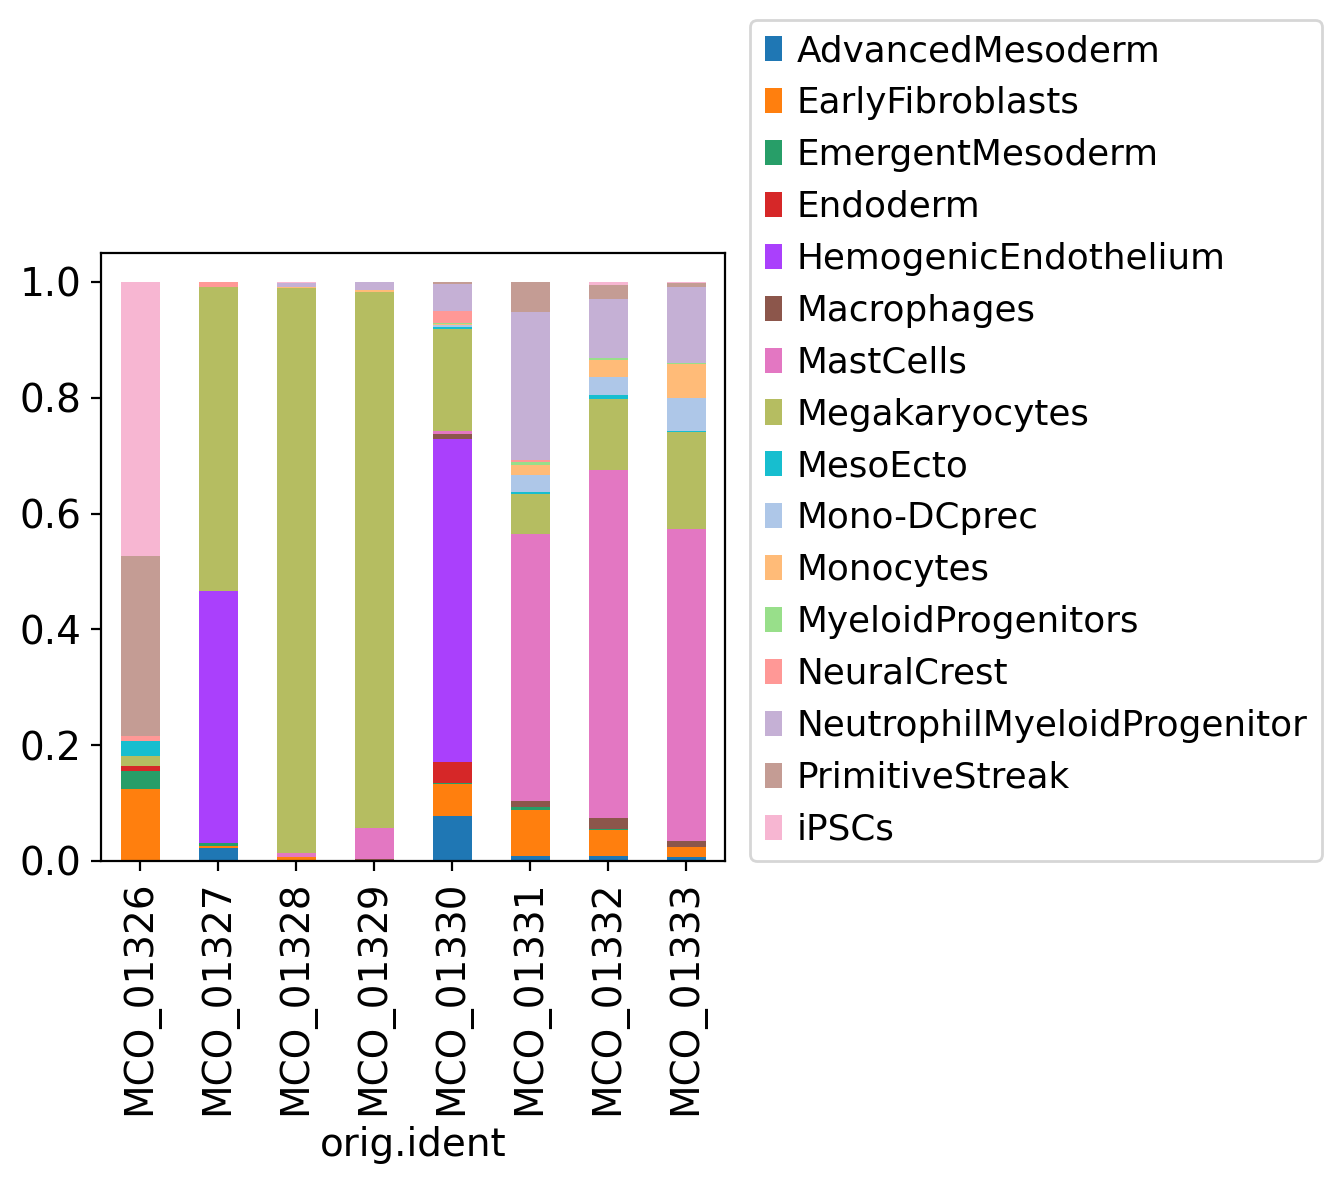

In [30]:
subset.obs.groupby('orig.ident')['predicted_labels'].value_counts(normalize=True).unstack().plot.bar(stacked=True, grid=False)
plt.legend(loc=(1.04, 0))

In [31]:
#for n in list(subset.obs['Genotype'].unique()):

#        wt = subset[subset.obs['Genotype'] == n]
#        wt.obs.groupby('time_diffgroup_geno')['predicted_labels'].value_counts(normalize=True).unstack().plot.bar(stacked=True, grid=False, figsize=(20,6), title=n)
#        plt.legend(loc=(1.04, 0))

In [32]:
#for n in list(subset.obs['Genotype'].unique()):'

#        wt = subset[subset.obs['Genotype'] == n]
 #       wt.obs.groupby('time_diffgroup_geno')['predicted_labels'].value_counts(normalize=False).unstack().plot.bar(stacked=True, grid=False, figsize=(20,6), title=n)
  #      plt.legend(loc=(1.04, 0))

In [33]:
#wt = subset[subset.obs['Genotype'] == 'G/G']

In [34]:
#wt.obs.groupby('time_diffgroup_geno')['predicted_labels'].value_counts(normalize=True).unstack().plot.bar(stacked=True, grid=False, figsize=(20,6))
#plt.legend(loc=(1.04, 0))

In [35]:
#wt.obs.groupby('time_diffgroup_geno')['predicted_labels'].value_counts(normalize=False).unstack().plot.bar(stacked=True, grid=False, figsize=(20,6))
#plt.legend(loc=(1.04, 0))

In [36]:
import os
from matplotlib import pyplot as plt


In [37]:
os.chdir("/scratch/manuel.tardaguila/2025_hESC_competition_assays_reanalysed/processing_outputs/graphs/")

### checking confidence score

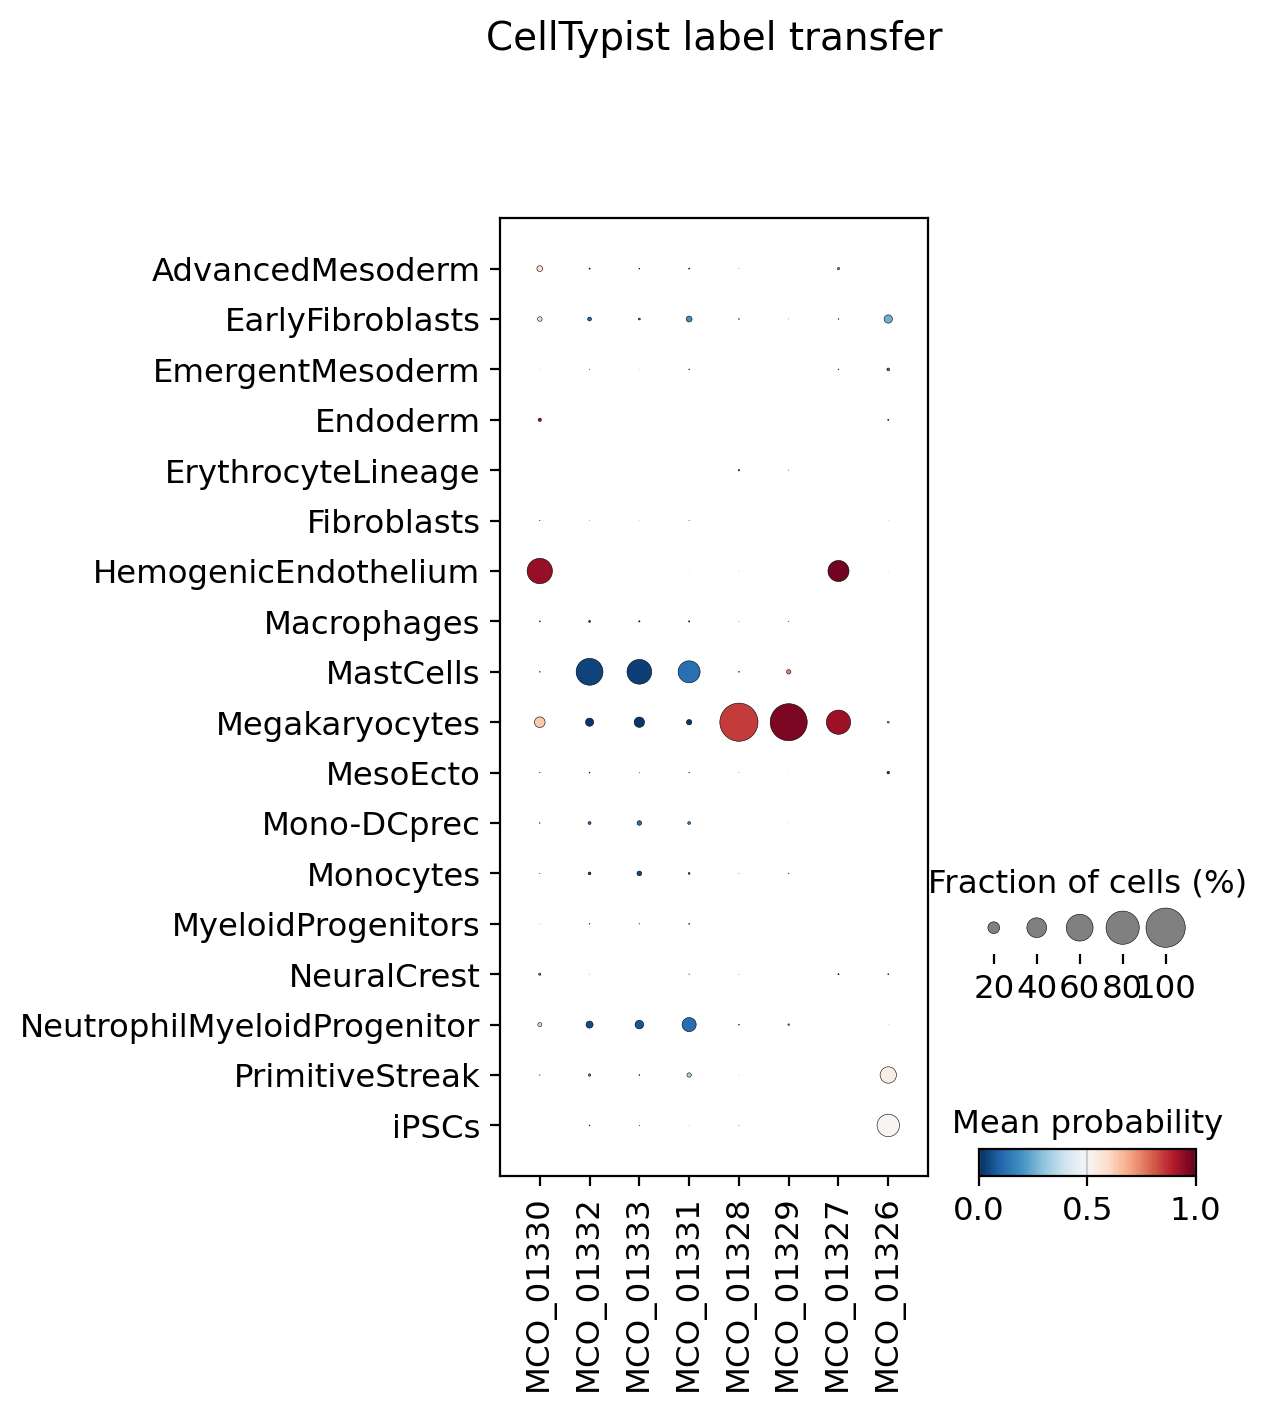

In [38]:
celltypist.dotplot(predictions, use_as_reference = 'orig.ident', use_as_prediction = 'predicted_labels', save='Dotplot_Alsinet.pdf')

In [39]:
#celltypist.dotplot??

### save results

In [40]:
adata.obs.to_csv('/scratch/manuel.tardaguila/2025_hESC_competition_assays_reanalysed/processing_outputs/Alsinet_celltypist_prediction.csv')

# import model f_BMA

In [41]:
new_model = models.Model.load('/group/soranzo/manuel.tardaguila/2025_hESC_MK_multiome/Dependencies/model_from_BMA.pkl')

In [42]:
new_model

CellTypist model with 64 cell types and 6071 features
    date: 2024-04-09 21:20:12.035942
    cell types: CD14 monocyte, CD4 T cell, ..., tip EC
    features: SAMD11, HES4, ..., RGR

In [43]:
adata.X.expm1().sum(axis = 1)

matrix([[10000.],
        [10000.],
        [10000.],
        ...,
        [10000.],
        [10000.],
        [10000.]])

In [44]:
#celltypist.annotate??

In [45]:
predictions = celltypist.annotate(adata, model = new_model)

🔬 Input data has 26185 cells and 30587 genes
🔗 Matching reference genes in the model
🧬 5630 features used for prediction
⚖️ Scaling input data
🖋️ Predicting labels
✅ Prediction done!


In [46]:
adata = predictions.to_adata()

In [47]:
adata.obs.head(2)

,orig.ident,nCount_RNA,nFeature_RNA,percent.mt,nCount_RNA_raw,nFeature_RNA_raw,nCount_ATAC,nFeature_ATAC,gex_raw_reads,gex_mapped_reads,...,nCount_SCT,nFeature_SCT,SCT.weight,ATAC.weight,wsnn_res.2,seurat_clusters,wsnn_res.0.5,n_counts,predicted_labels,conf_score
cell_barcode,,,,,,,,,,,,,,,,,,,,,
MCO_01326_AAACAGCCACAGCCAT-1,MCO_01326,10351.0,4753,0.473384,11643.0,4772,29946.0,7431,23298,22654,...,10810.0,4752,0.752996,0.247004,7,2,2,4818.728005,DC3,1.0
MCO_01326_AAACAGCCACCAGGTT-1,MCO_01326,9507.0,4435,0.336594,10909.0,4612,90488.0,20806,21771,21165,...,10669.0,4435,0.577344,0.422656,7,2,2,4599.102598,DC3,1.0


### visualize celltypist predictions

In [48]:
adata.obs['predicted_labels'].value_counts()

predicted_labels
late erythroid             4964
MK                         3357
CD56 bright NK             2284
DC3                        2254
CD4 T cell                 1801
GMP                        1540
myelocyte                  1465
pre pro B progenitor       1360
tip EC                      778
promonocyte                 663
MEP                         632
early erythroid             507
sinusoidal EC               503
early MK                    489
schwann cells               374
neutrophil                  309
NK T cell                   289
ELP                         266
eosinophil                  238
CD14 monocyte               228
osteoblast precursor        227
naive B cell                220
mature NK                   155
NK progenitor               153
monocytoid macrophage       151
MOP                         118
osteoclast                  107
mast cell                   104
pro B progenitor             89
promyelocyte                 84
osteochondral precursor

In [49]:
## remove labels under 50 cells
adata.obs['predicted_labels'].value_counts() > 50

predicted_labels
late erythroid              True
MK                          True
CD56 bright NK              True
DC3                         True
CD4 T cell                  True
GMP                         True
myelocyte                   True
pre pro B progenitor        True
tip EC                      True
promonocyte                 True
MEP                         True
early erythroid             True
sinusoidal EC               True
early MK                    True
schwann cells               True
neutrophil                  True
NK T cell                   True
ELP                         True
eosinophil                  True
CD14 monocyte               True
osteoblast precursor        True
naive B cell                True
mature NK                   True
NK progenitor               True
monocytoid macrophage       True
MOP                         True
osteoclast                  True
mast cell                   True
pro B progenitor            True
promyelocyte              

In [50]:
## remove labels under 100 cells
adata.obs['predicted_labels'].value_counts() > 100

predicted_labels
late erythroid              True
MK                          True
CD56 bright NK              True
DC3                         True
CD4 T cell                  True
GMP                         True
myelocyte                   True
pre pro B progenitor        True
tip EC                      True
promonocyte                 True
MEP                         True
early erythroid             True
sinusoidal EC               True
early MK                    True
schwann cells               True
neutrophil                  True
NK T cell                   True
ELP                         True
eosinophil                  True
CD14 monocyte               True
osteoblast precursor        True
naive B cell                True
mature NK                   True
NK progenitor               True
monocytoid macrophage       True
MOP                         True
osteoclast                  True
mast cell                   True
pro B progenitor           False
promyelocyte              

In [51]:
counts = adata.obs['predicted_labels'].value_counts() 
valids = counts[counts>50].index

adata[adata.obs['predicted_labels'].isin(valids)]

View of AnnData object with n_obs × n_vars = 26043 × 30587
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'percent.mt', 'nCount_RNA_raw', 'nFeature_RNA_raw', 'nCount_ATAC', 'nFeature_ATAC', 'gex_raw_reads', 'gex_mapped_reads', 'gex_conf_intergenic_reads', 'gex_conf_exonic_reads', 'gex_conf_intronic_reads', 'gex_conf_exonic_unique_reads', 'gex_conf_exonic_antisense_reads', 'gex_conf_exonic_dup_reads', 'gex_exonic_umis', 'gex_conf_intronic_unique_reads', 'gex_conf_intronic_antisense_reads', 'gex_conf_intronic_dup_reads', 'gex_intronic_umis', 'gex_conf_txomic_unique_reads', 'gex_umis_count', 'gex_genes_count', 'atac_raw_reads', 'atac_unmapped_reads', 'atac_lowmapq', 'atac_dup_reads', 'atac_chimeric_reads', 'atac_mitochondrial_reads', 'atac_fragments', 'atac_TSS_fragments', 'atac_peak_region_fragments', 'atac_peak_region_cutsites', 'TSS.enrichment', 'TSS.percentile', 'scDblFinder.class', 'scDblFinder.score', 'scDblFinder.weighted', 'scDblFinder.cxds_score', 'scDblFinder.class_atac', 

In [52]:
subset = adata[adata.obs['predicted_labels'].isin(valids)]

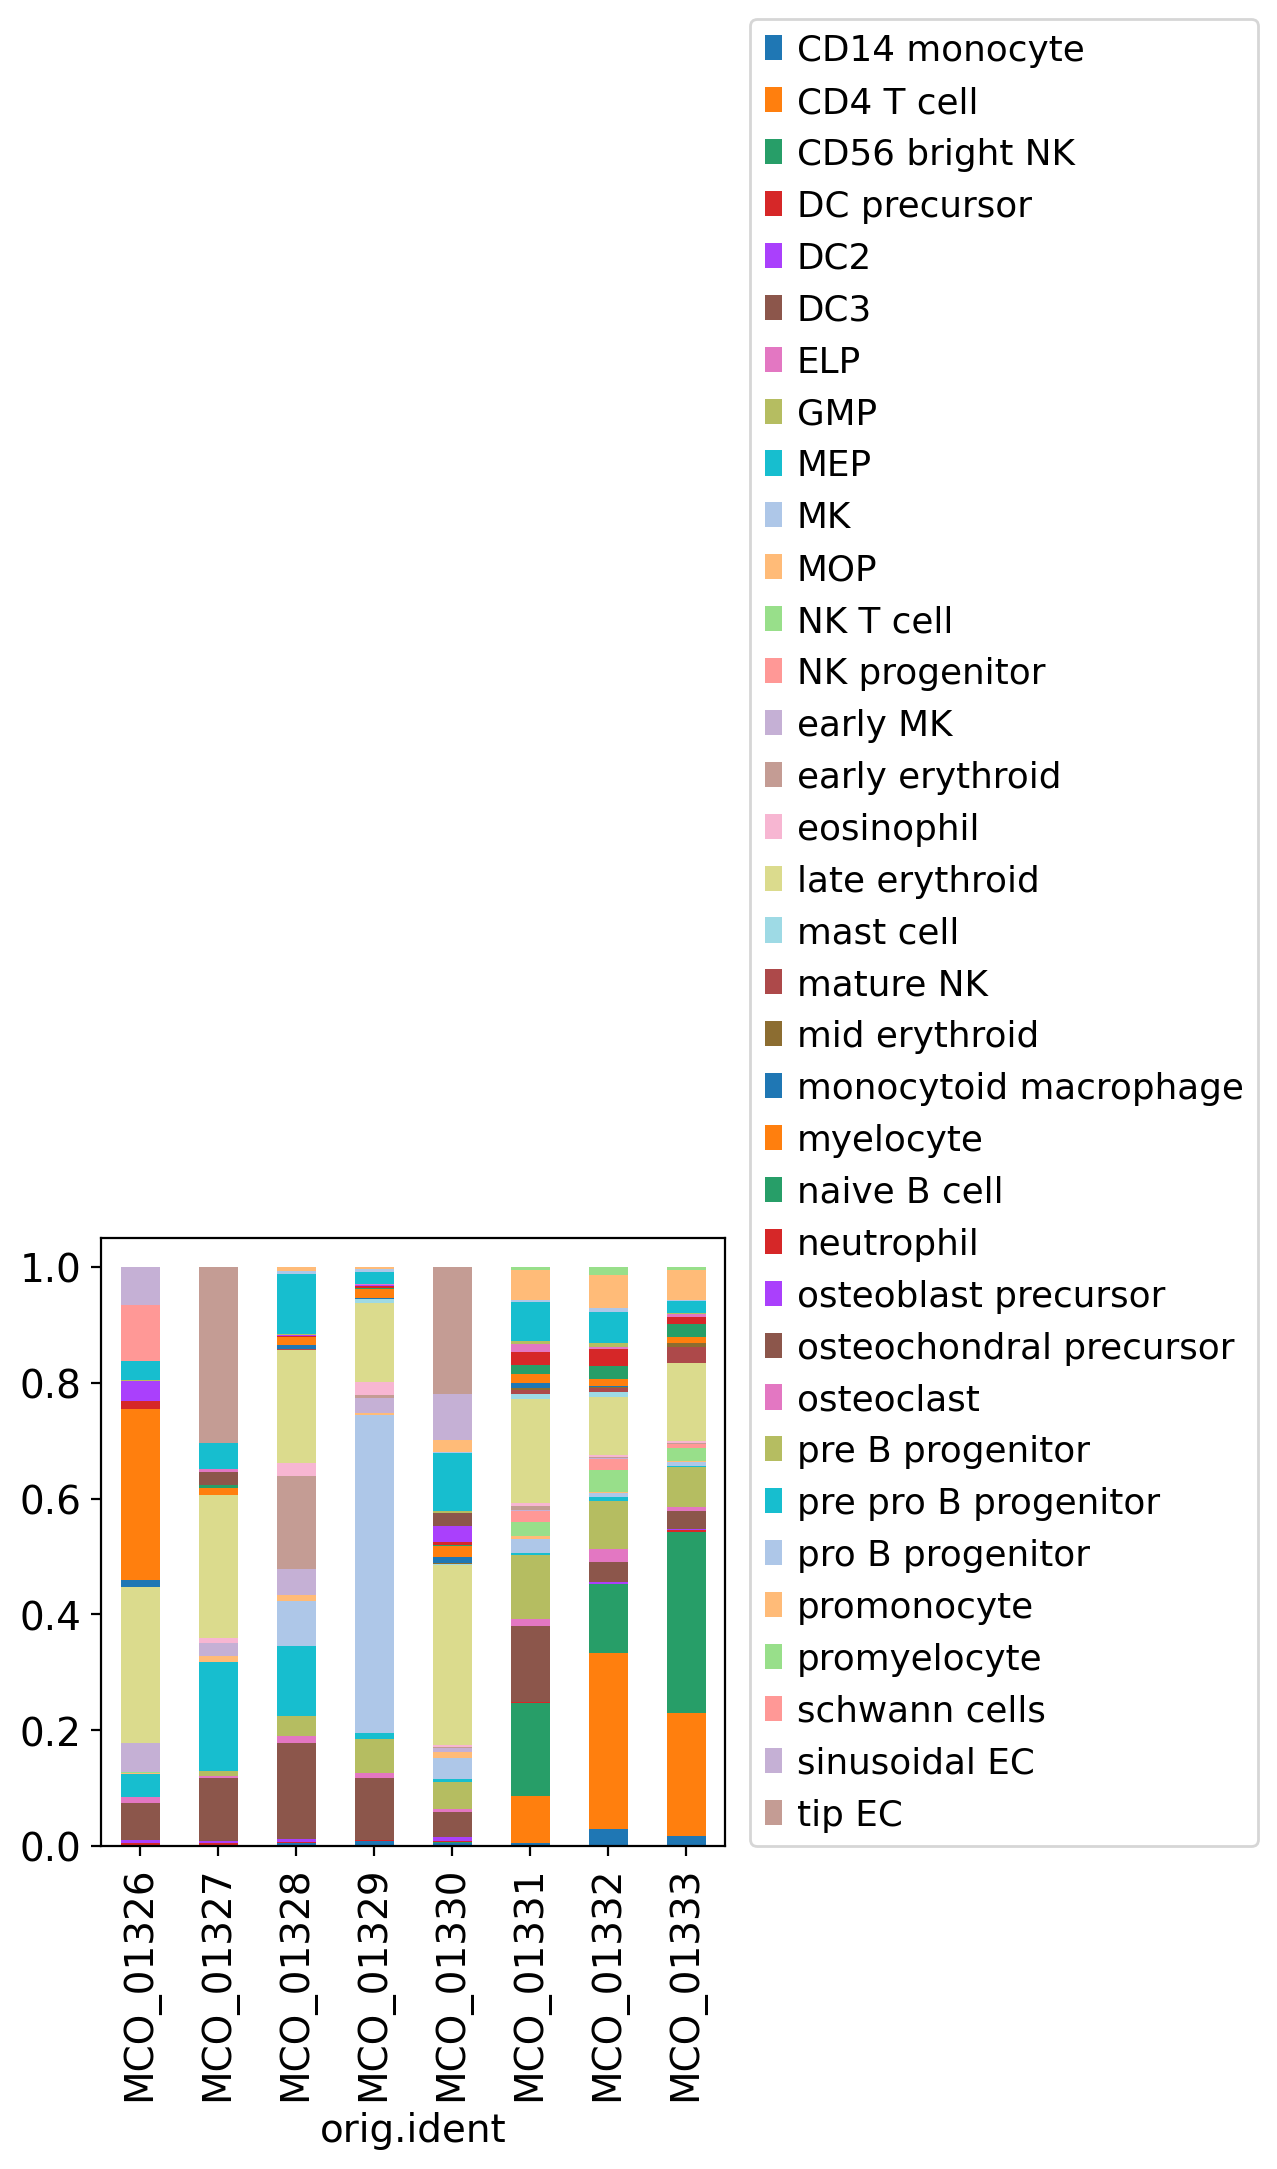

In [53]:
subset.obs.groupby('orig.ident')['predicted_labels'].value_counts(normalize=True).unstack().plot.bar(stacked=True, grid=False)
plt.legend(loc=(1.04, 0))

In [54]:
#for n in list(subset.obs['Genotype'].unique()):

#        wt = subset[subset.obs['Genotype'] == n]
#        wt.obs.groupby('time_diffgroup_geno')['predicted_labels'].value_counts(normalize=True).unstack().plot.bar(stacked=True, grid=False, figsize=(20,6), title=n)
#        plt.legend(loc=(1.04, 0))

In [55]:
#for n in list(subset.obs['Genotype'].unique()):'

#        wt = subset[subset.obs['Genotype'] == n]
 #       wt.obs.groupby('time_diffgroup_geno')['predicted_labels'].value_counts(normalize=False).unstack().plot.bar(stacked=True, grid=False, figsize=(20,6), title=n)
  #      plt.legend(loc=(1.04, 0))

In [56]:
#wt = subset[subset.obs['Genotype'] == 'G/G']

In [57]:
#wt.obs.groupby('time_diffgroup_geno')['predicted_labels'].value_counts(normalize=True).unstack().plot.bar(stacked=True, grid=False, figsize=(20,6))
#plt.legend(loc=(1.04, 0))

In [58]:
#wt.obs.groupby('time_diffgroup_geno')['predicted_labels'].value_counts(normalize=False).unstack().plot.bar(stacked=True, grid=False, figsize=(20,6))
#plt.legend(loc=(1.04, 0))

In [59]:
import os
from matplotlib import pyplot as plt


In [60]:
os.chdir("/scratch/manuel.tardaguila/2025_hESC_competition_assays_reanalysed/processing_outputs/graphs/")

### checking confidence score

In [61]:
#celltypist.dotplot??

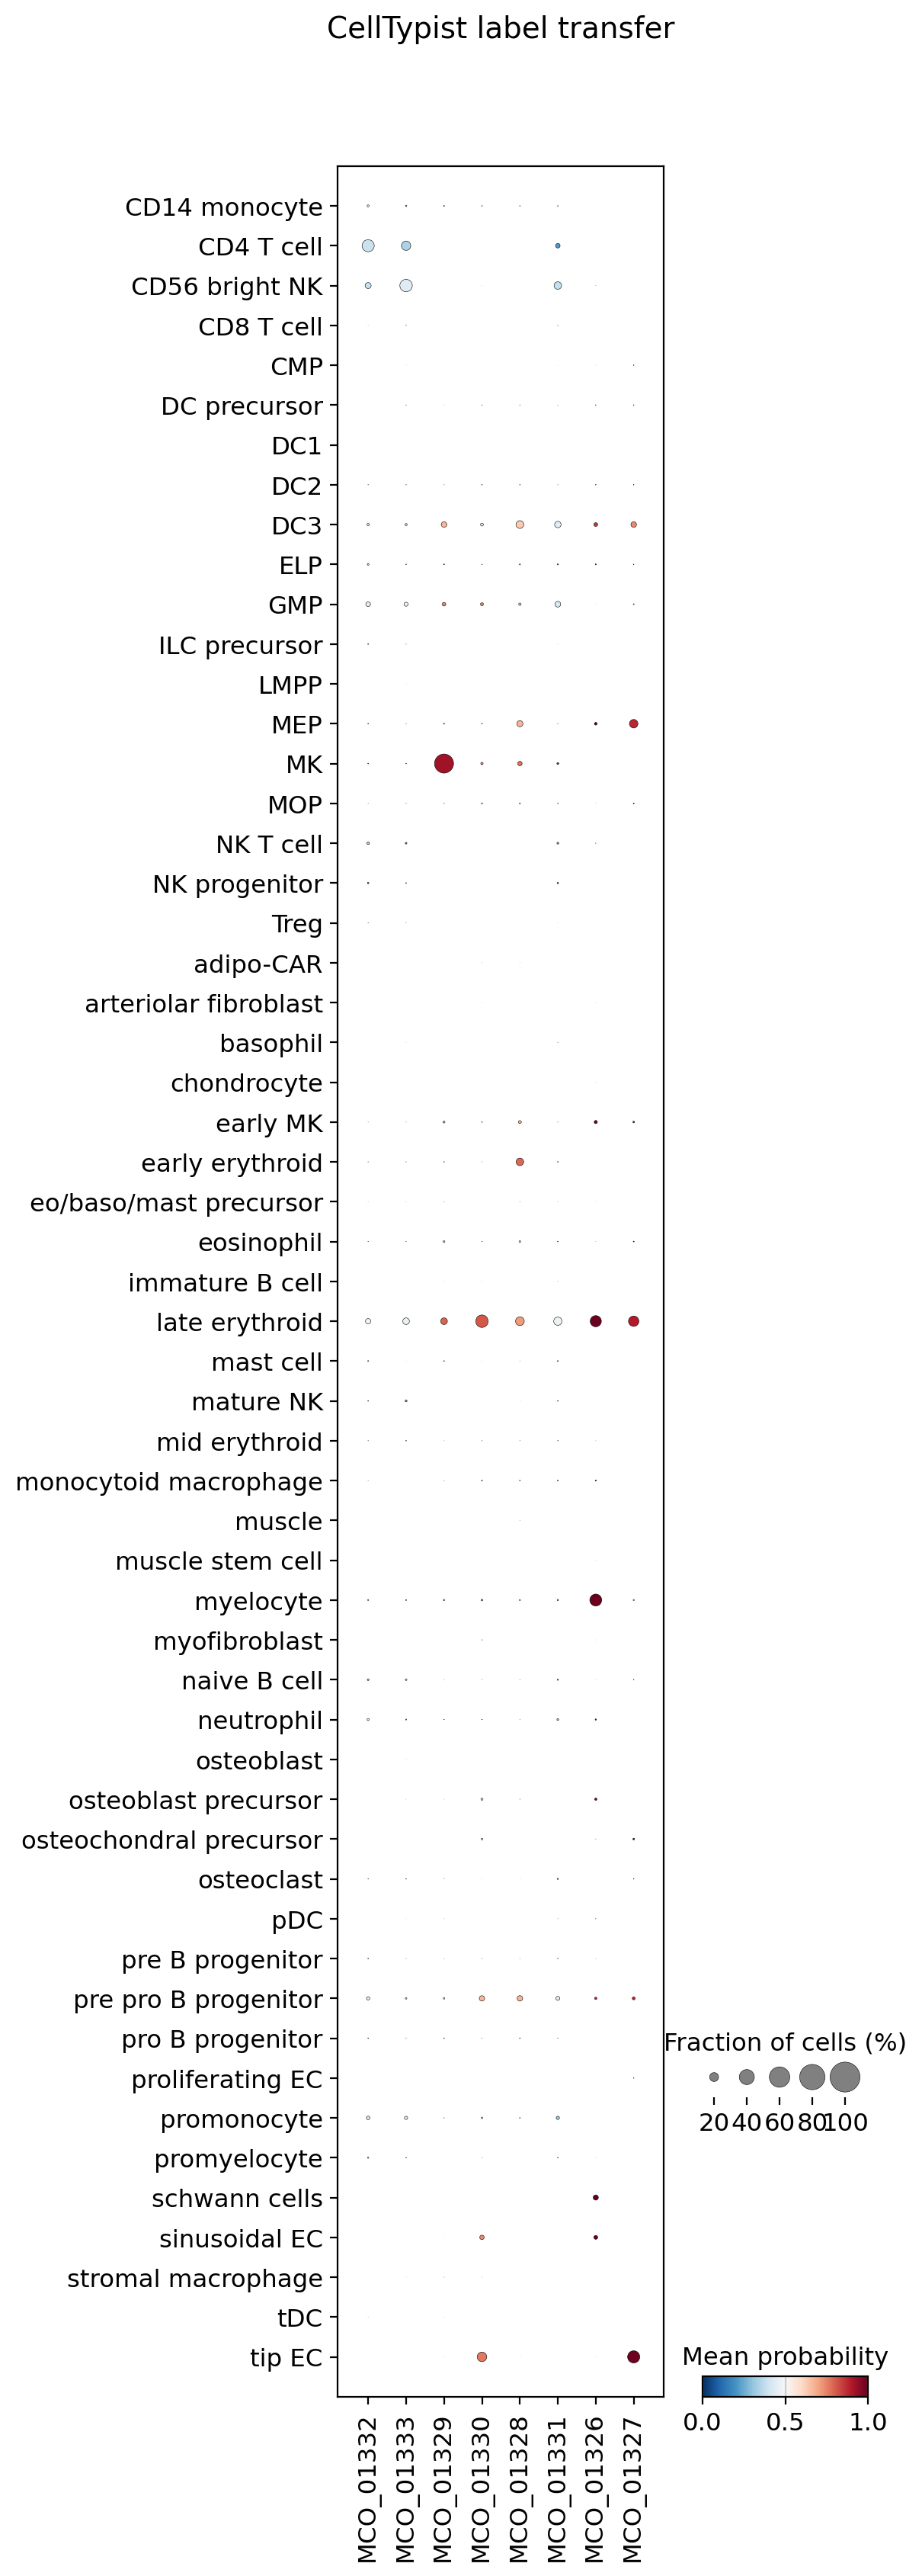

In [62]:
celltypist.dotplot(predictions, use_as_reference = 'orig.ident', use_as_prediction = 'predicted_labels', save='Dotplot_FBMA.pdf')

### save results

In [63]:
adata.obs.to_csv('/scratch/manuel.tardaguila/2025_hESC_competition_assays_reanalysed/processing_outputs/FBMA_celltypist_prediction.csv')

# import model Immune_All_Low

In [64]:
new_model = models.Model.load("/group/soranzo/manuel.tardaguila/2025_hESC_MK_multiome/Dependencies/Immune_All_Low.pkl")

In [65]:
new_model

CellTypist model with 98 cell types and 6639 features
    date: 2022-07-16 00:20:42.927778
    details: immune sub-populations combined from 20 tissues of 18 studies
    source: https://doi.org/10.1126/science.abl5197
    version: v2
    cell types: Age-associated B cells, Alveolar macrophages, ..., pDC precursor
    features: A1BG, A2M, ..., ZYX

In [66]:
adata.X.expm1().sum(axis = 1)

matrix([[10000.],
        [10000.],
        [10000.],
        ...,
        [10000.],
        [10000.],
        [10000.]])

In [67]:
#celltypist.annotate??

In [68]:
predictions = celltypist.annotate(adata, model = new_model)

🔬 Input data has 26185 cells and 30587 genes
🔗 Matching reference genes in the model
🧬 5831 features used for prediction
⚖️ Scaling input data
🖋️ Predicting labels
✅ Prediction done!


In [69]:
adata = predictions.to_adata()

In [ ]:
adata.obs.head(2)

### visualize celltypist predictions

In [ ]:
adata.obs['predicted_labels'].value_counts()

In [ ]:
## remove labels under 50 cells
adata.obs['predicted_labels'].value_counts() > 50

In [ ]:
## remove labels under 100 cells
adata.obs['predicted_labels'].value_counts() > 100

In [ ]:
counts = adata.obs['predicted_labels'].value_counts() 
valids = counts[counts>50].index

adata[adata.obs['predicted_labels'].isin(valids)]

In [ ]:
subset = adata[adata.obs['predicted_labels'].isin(valids)]

In [ ]:
subset.obs.groupby('orig.ident')['predicted_labels'].value_counts(normalize=True).unstack().plot.bar(stacked=True, grid=False)
plt.legend(loc=(1.04, 0))

In [ ]:
#for n in list(subset.obs['Genotype'].unique()):

#        wt = subset[subset.obs['Genotype'] == n]
#        wt.obs.groupby('time_diffgroup_geno')['predicted_labels'].value_counts(normalize=True).unstack().plot.bar(stacked=True, grid=False, figsize=(20,6), title=n)
#        plt.legend(loc=(1.04, 0))

In [ ]:
#for n in list(subset.obs['Genotype'].unique()):'

#        wt = subset[subset.obs['Genotype'] == n]
 #       wt.obs.groupby('time_diffgroup_geno')['predicted_labels'].value_counts(normalize=False).unstack().plot.bar(stacked=True, grid=False, figsize=(20,6), title=n)
  #      plt.legend(loc=(1.04, 0))

In [ ]:
#wt = subset[subset.obs['Genotype'] == 'G/G']

In [ ]:
#wt.obs.groupby('time_diffgroup_geno')['predicted_labels'].value_counts(normalize=True).unstack().plot.bar(stacked=True, grid=False, figsize=(20,6))
#plt.legend(loc=(1.04, 0))

In [ ]:
#wt.obs.groupby('time_diffgroup_geno')['predicted_labels'].value_counts(normalize=False).unstack().plot.bar(stacked=True, grid=False, figsize=(20,6))
#plt.legend(loc=(1.04, 0))

In [ ]:
import os
from matplotlib import pyplot as plt


In [ ]:
os.chdir("/scratch/manuel.tardaguila/2025_hESC_competition_assays_reanalysed/processing_outputs/graphs/")

### checking confidence score

In [ ]:
celltypist.dotplot(predictions, use_as_reference = 'orig.ident', use_as_prediction = 'predicted_labels', save="Immune_ALL_low.pdf")

### save results

In [ ]:
adata.obs.to_csv('/scratch/manuel.tardaguila/2025_hESC_competition_assays_reanalysed/processing_outputs/Immune_ALL_low_celltypist_prediction.csv')